In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, train_size=0.5)

In [2]:
clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='tanh', learning_rate_init=0.005, n_iter_no_change=100, early_stopping=True, alpha=0.1, solver='adam', verbose=10, validation_fraction=0.2, max_iter=1000)
      
    

print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = 0.42761865
Validation score: 0.940857
Iteration 2, loss = 0.25778660
Validation score: 0.942857
Iteration 3, loss = 0.21729626
Validation score: 0.958143
Iteration 4, loss = 0.19901987
Validation score: 0.957857
Iteration 5, loss = 0.18573542
Validation score: 0.959429
Iteration 6, loss = 0.17940868
Validation score: 0.950286
Iteration 7, loss = 0.17634455
Validation score: 0.960857
Iteration 8, loss = 0.17489202
Validation score: 0.958571
Iteration 9, loss = 0.17300800
Validation score: 0.958429
Iteration 10, loss = 0.16498273
Validation score: 0.957571
Iteration 11, loss = 0.16839750
Validation score: 0.962429
Iteration 12, loss = 0.15846762
Validation score: 0.955429
Iteration 13, loss = 0.16554636
Validation score: 0.956857
Iteration 14, loss = 0.16039327
Validation score: 0.962000
Iteration 15, loss = 0.16759678
Validation score: 0.960429
Iteration 16, loss = 0.16486610
Validation score: 0.958714
Iteration 17, loss = 0.16151937
Validation score: 0.960714
Iterat

Iteration 140, loss = 0.14233398
Validation score: 0.968571
Iteration 141, loss = 0.14054904
Validation score: 0.967857
Iteration 142, loss = 0.12662423
Validation score: 0.968000
Iteration 143, loss = 0.14181790
Validation score: 0.962000
Iteration 144, loss = 0.13933737
Validation score: 0.962714
Iteration 145, loss = 0.14297405
Validation score: 0.965143
Iteration 146, loss = 0.13437186
Validation score: 0.967143
Iteration 147, loss = 0.13120964
Validation score: 0.965000
Iteration 148, loss = 0.13630395
Validation score: 0.969143
Iteration 149, loss = 0.13624530
Validation score: 0.964286
Iteration 150, loss = 0.13056546
Validation score: 0.966286
Iteration 151, loss = 0.13472660
Validation score: 0.960571
Iteration 152, loss = 0.15083790
Validation score: 0.963286
Iteration 153, loss = 0.14096742
Validation score: 0.967714
Iteration 154, loss = 0.13351004
Validation score: 0.969429
Iteration 155, loss = 0.13203529
Validation score: 0.963429
Iteration 156, loss = 0.13484656
Validat

Iteration 277, loss = 0.13783857
Validation score: 0.968714
Iteration 278, loss = 0.13776216
Validation score: 0.969286
Iteration 279, loss = 0.12645691
Validation score: 0.967714
Iteration 280, loss = 0.13619025
Validation score: 0.969143
Iteration 281, loss = 0.12815944
Validation score: 0.965429
Validation score did not improve more than tol=0.000100 for 100 consecutive epochs. Stopping.
MLPClassifier(activation='tanh', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.005, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=100, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.2, verbose=10,
              warm_start=False)
Score =  0.9707714285714286
[2.18734290e-06 9.87641010e-01 1.00296868e-04 ... 1.0

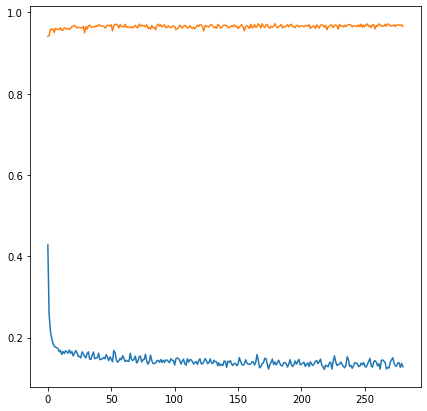

In [3]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
#print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

In [4]:
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


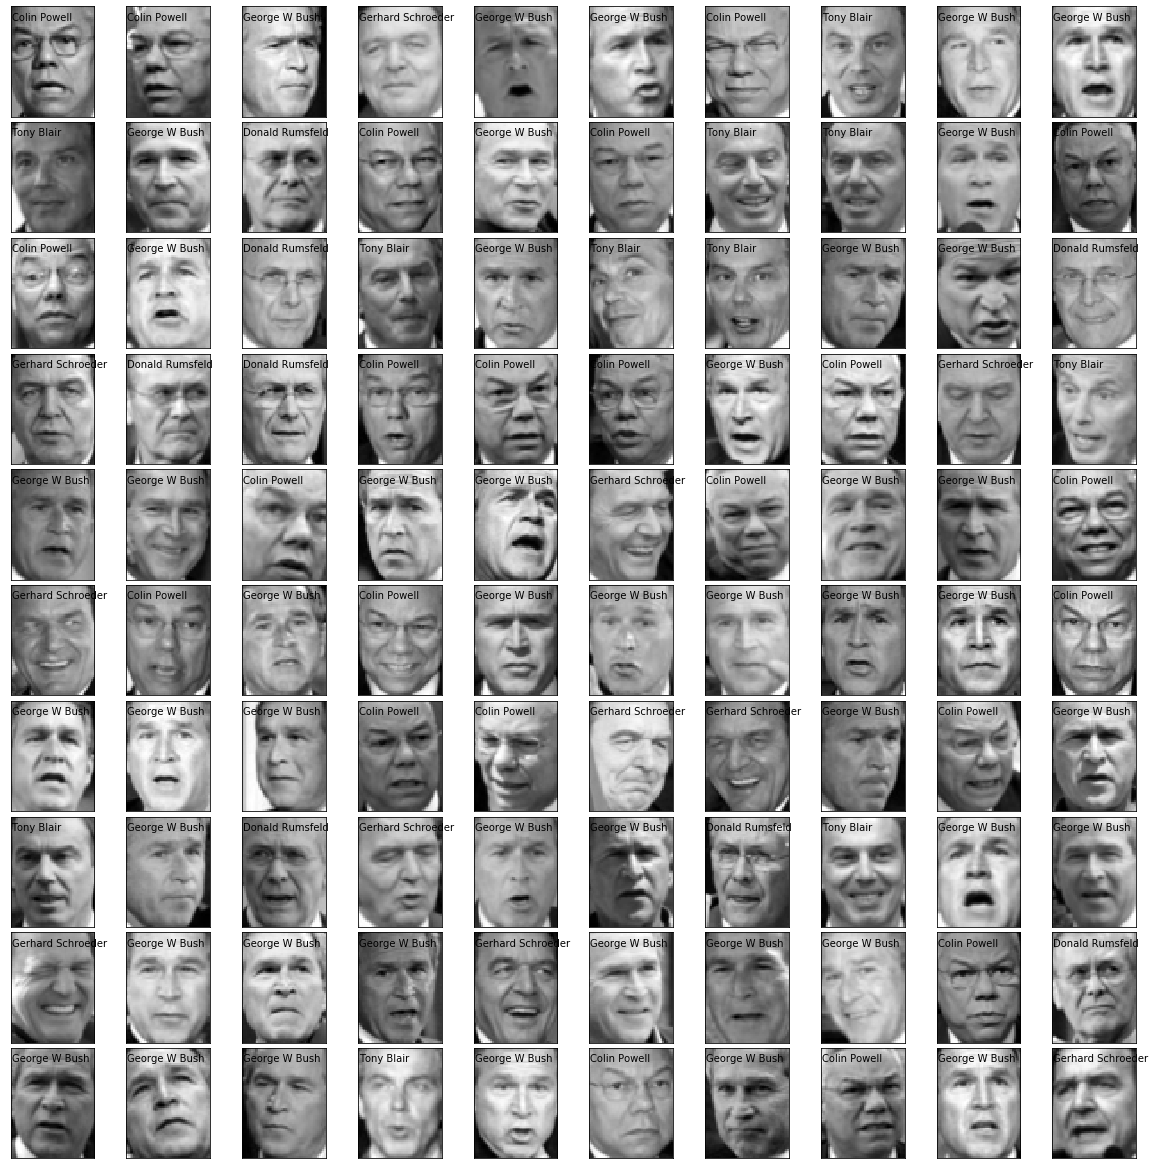

In [5]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
 
for i in range(100):
 ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
 ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
 # label the image with the target value
 ax.text(0, 7, str(target_names[y_test[i]]))

In [6]:
clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', alpha=1, learning_rate_init=0.001, early_stopping=True,validation_fraction=0.2,solver='adam',verbose=10,n_iter_no_change=90,max_iter=1000)


print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = inf
Validation score: 0.093567
Iteration 2, loss = inf
Validation score: 0.239766
Iteration 3, loss = inf
Validation score: 0.187135
Iteration 4, loss = 107.65155517
Validation score: 0.298246
Iteration 5, loss = 59.15377657
Validation score: 0.497076
Iteration 6, loss = 42.59401209
Validation score: 0.198830
Iteration 7, loss = 40.15569120
Validation score: 0.245614
Iteration 8, loss = 22.83496644
Validation score: 0.198830
Iteration 9, loss = 20.76689150
Validation score: 0.426901
Iteration 10, loss = 15.74839856
Validation score: 0.309942
Iteration 11, loss = 19.19599258
Validation score: 0.508772
Iteration 12, loss = 12.17155005
Validation score: 0.473684
Iteration 13, loss = 24.08546187
Validation score: 0.333333
Iteration 14, loss = 19.06915144
Validation score: 0.508772
Iteration 15, loss = 14.12554021
Validation score: 0.532164
Iteration 16, loss = 17.60067836
Validation score: 0.520468
Iteration 17, loss = 9.09278903
Validation score: 0.497076
Iteration 18,

Iteration 141, loss = 0.86306368
Validation score: 0.725146
Iteration 142, loss = 0.84576342
Validation score: 0.771930
Iteration 143, loss = 0.88755194
Validation score: 0.766082
Iteration 144, loss = 0.85255910
Validation score: 0.801170
Iteration 145, loss = 0.78592961
Validation score: 0.766082
Iteration 146, loss = 0.81214426
Validation score: 0.713450
Iteration 147, loss = 0.86042575
Validation score: 0.783626
Iteration 148, loss = 0.87192939
Validation score: 0.754386
Iteration 149, loss = 0.78296599
Validation score: 0.818713
Iteration 150, loss = 0.71142860
Validation score: 0.789474
Iteration 151, loss = 0.71947372
Validation score: 0.795322
Iteration 152, loss = 0.73775482
Validation score: 0.801170
Iteration 153, loss = 0.71640793
Validation score: 0.801170
Iteration 154, loss = 0.70946967
Validation score: 0.807018
Iteration 155, loss = 0.74454995
Validation score: 0.812865
Iteration 156, loss = 0.75688687
Validation score: 0.754386
Iteration 157, loss = 0.83464161
Validat

In [7]:
####################################################
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


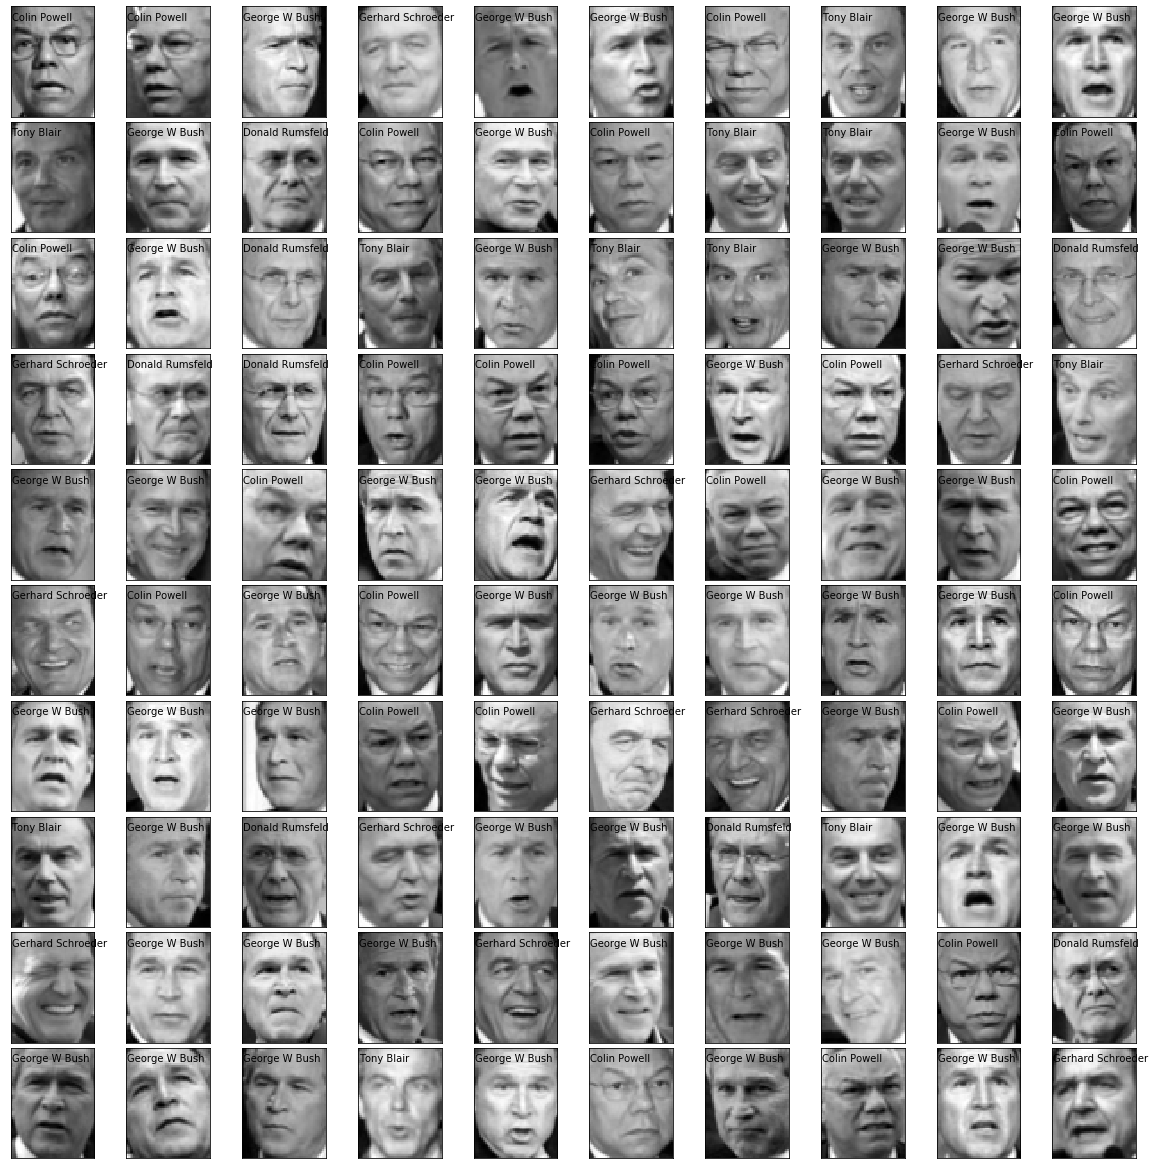

In [8]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(target_names[y_test[i]]))

In [9]:
# train the model
clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', alpha=1, learning_rate_init=0.001, early_stopping=True,validation_fraction=0.2,solver='adam',verbose=10,n_iter_no_change=90,max_iter=1000) 

print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = inf
Validation score: 0.491228
Iteration 2, loss = inf
Validation score: 0.532164
Iteration 3, loss = 98.89228185
Validation score: 0.146199
Iteration 4, loss = 111.43440095
Validation score: 0.502924
Iteration 5, loss = 101.87630865
Validation score: 0.497076
Iteration 6, loss = 53.74761578
Validation score: 0.497076
Iteration 7, loss = 33.16960301
Validation score: 0.502924
Iteration 8, loss = 40.73650090
Validation score: 0.456140
Iteration 9, loss = 25.47122668
Validation score: 0.175439
Iteration 10, loss = 22.53368288
Validation score: 0.473684
Iteration 11, loss = 29.57721292
Validation score: 0.461988
Iteration 12, loss = 25.01254461
Validation score: 0.590643
Iteration 13, loss = 13.43428643
Validation score: 0.514620
Iteration 14, loss = 11.51530237
Validation score: 0.578947
Iteration 15, loss = 16.59817499
Validation score: 0.526316
Iteration 16, loss = 15.77597622
Validation score: 0.415205
Iteration 17, loss = 12.67654350
Validation score: 0.397661
Ite

Iteration 141, loss = 1.05617958
Validation score: 0.818713
Iteration 142, loss = 2.58986796
Validation score: 0.637427
Iteration 143, loss = 4.92182891
Validation score: 0.771930
Iteration 144, loss = 3.15212139
Validation score: 0.502924
Iteration 145, loss = 5.49187100
Validation score: 0.701754
Iteration 146, loss = 2.86777396
Validation score: 0.713450
Iteration 147, loss = 1.56062663
Validation score: 0.754386
Iteration 148, loss = 1.48462424
Validation score: 0.760234
Iteration 149, loss = 1.16261904
Validation score: 0.818713
Iteration 150, loss = 1.08720191
Validation score: 0.812865
Iteration 151, loss = 1.08155233
Validation score: 0.818713
Iteration 152, loss = 0.91478078
Validation score: 0.807018
Iteration 153, loss = 0.87461533
Validation score: 0.812865
Iteration 154, loss = 0.89033836
Validation score: 0.807018
Iteration 155, loss = 0.89208351
Validation score: 0.830409
Iteration 156, loss = 0.86036570
Validation score: 0.812865
Iteration 157, loss = 0.76531101
Validat

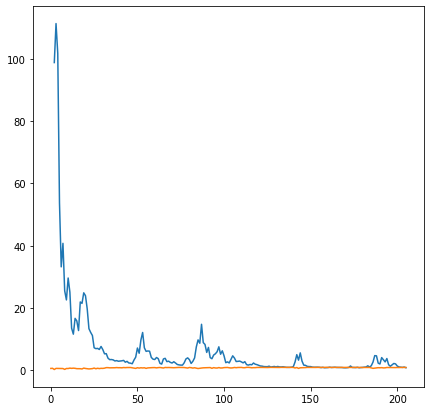

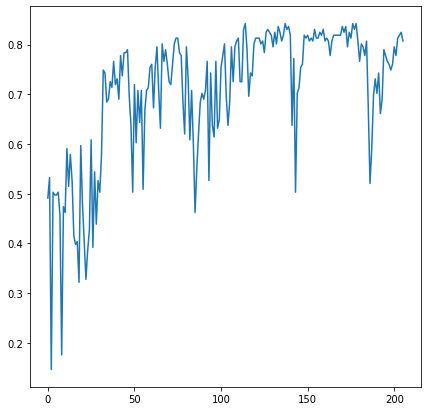

In [10]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
#print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()
fig=plt.figure(figsize=(7,7))

#plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True

plt.plot(np.asarray(clf.validation_scores_))

plt.show()

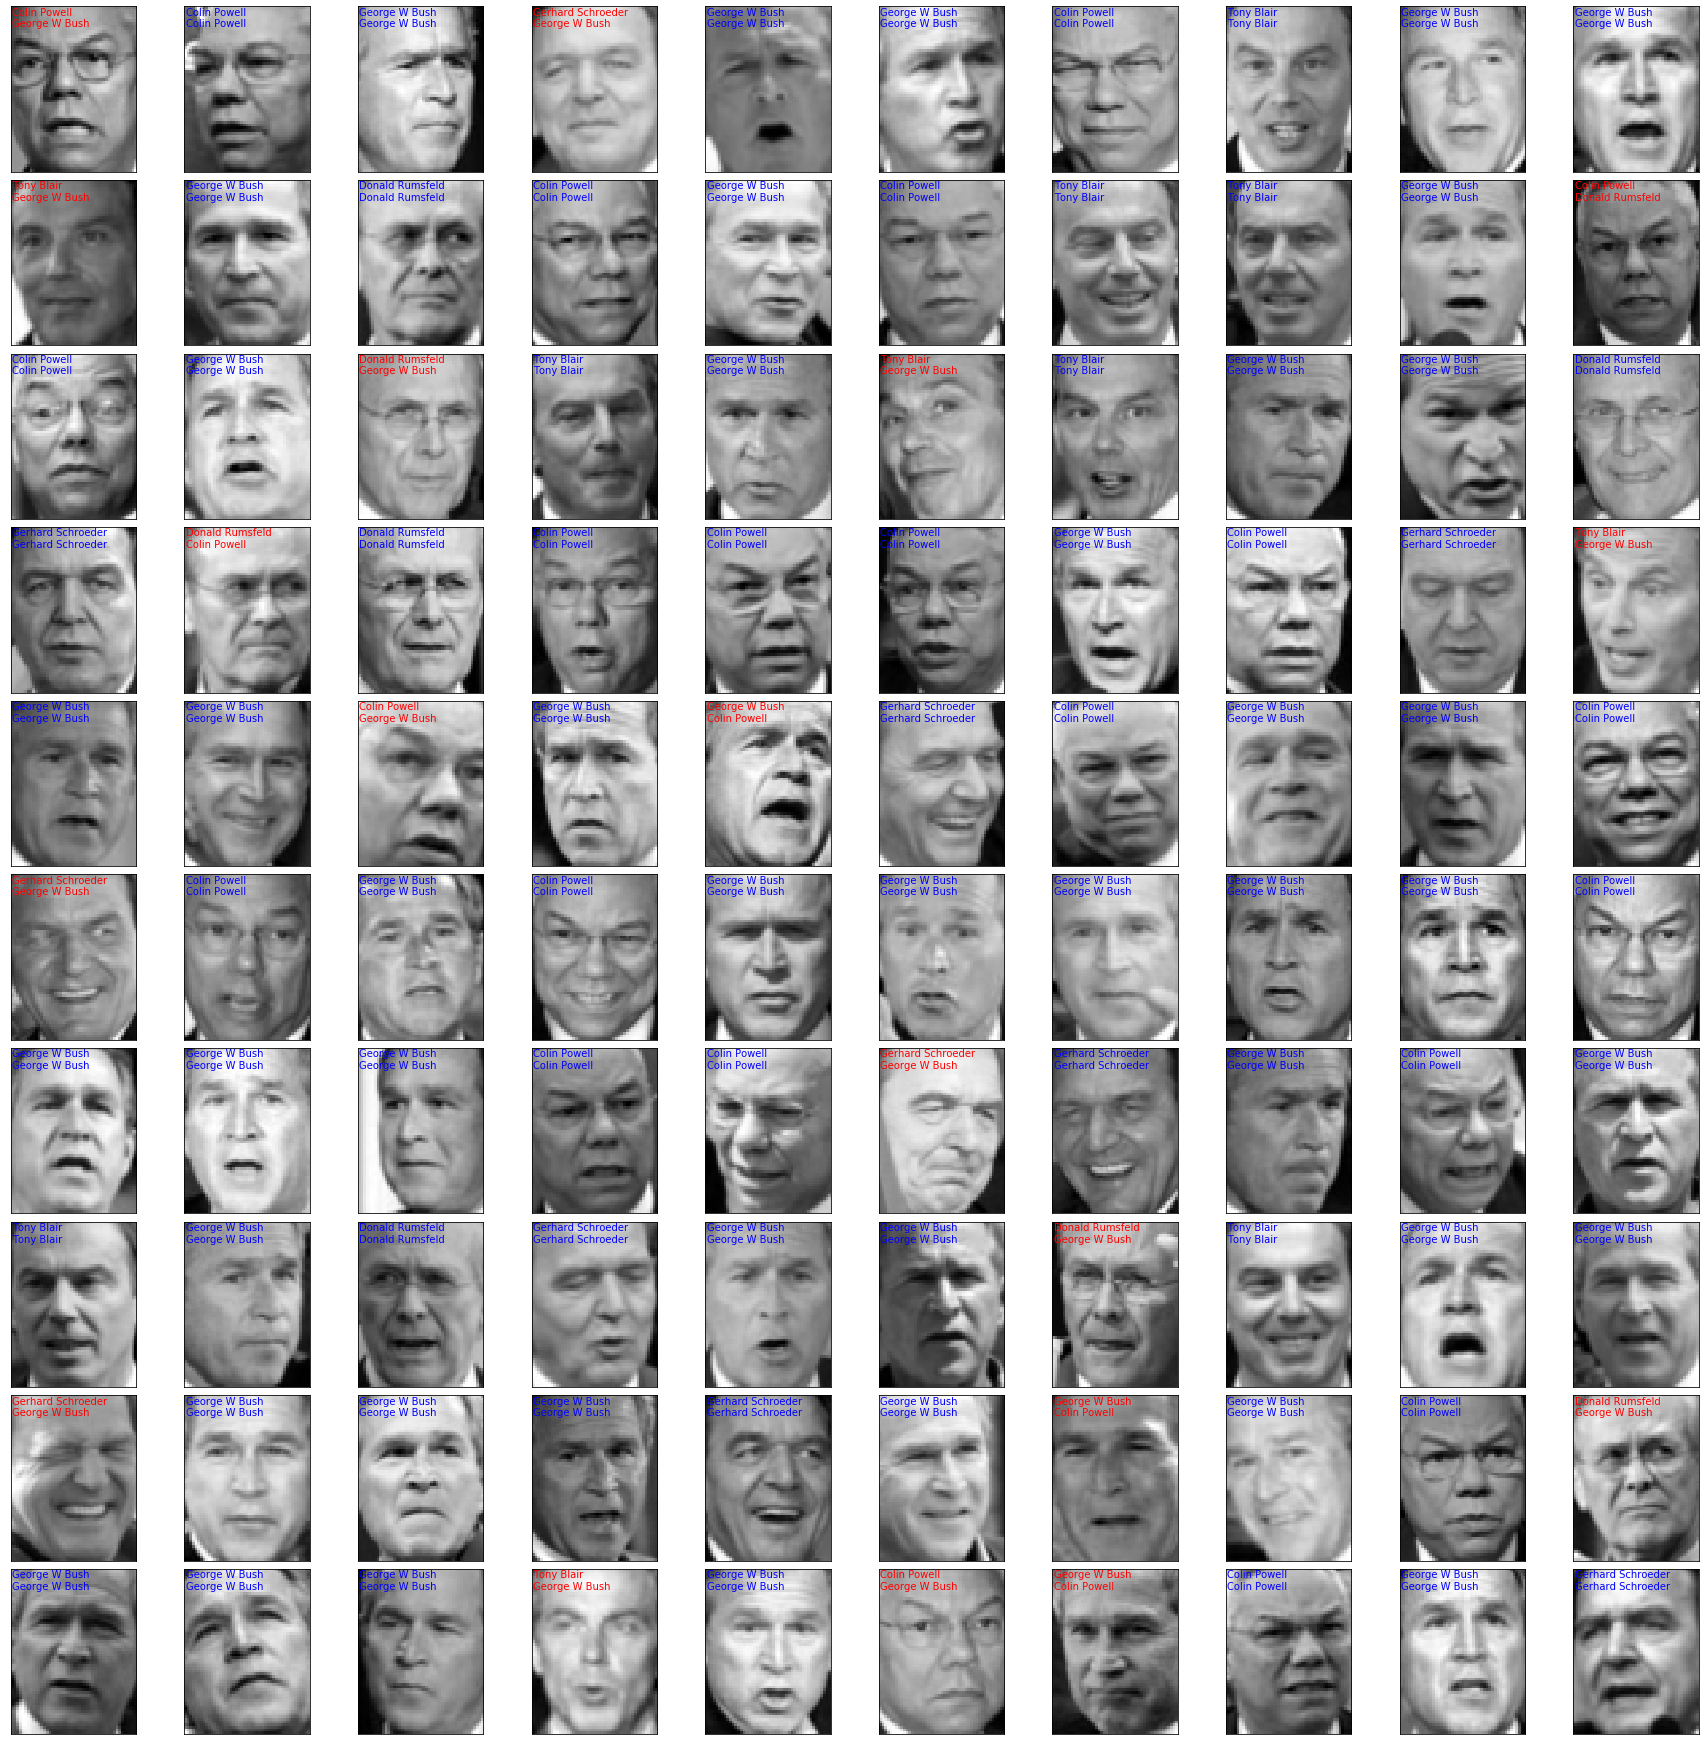

In [14]:
# Plot the prediction
predicted = clf.predict(X_test)
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(24, 24)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  if y_test[i]== predicted[i]:
    ax.text(0, 7, str(target_names[y_test[i]]) +" \n"+str(target_names[predicted[i]]), color='blue')
  else:
    ax.text(0, 7, str(target_names[y_test[i]]) +" \n"+str(target_names[predicted[i]]), color='red')

In [12]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        64
           1       0.84      0.50      0.63        32
           2       0.76      0.94      0.84       127
           3       0.77      0.69      0.73        29
           4       0.91      0.61      0.73        33

    accuracy                           0.80       285
   macro avg       0.83      0.71      0.75       285
weighted avg       0.81      0.80      0.79       285



In [13]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 53   1   9   0   1]
 [  3  16  10   3   0]
 [  4   2 119   2   0]
 [  2   0   6  20   1]
 [  0   0  12   1  20]]
